In [2]:
import sys, os
import pandas as pd


In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [ ]:
%cd ../../

/mnt/ceph1-npx/user/nlad/NNMFitStuff


/home/nlad/NNMFit_venv_test/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


: 

In [6]:
#plot_data_mc?

In [ ]:
###for LvsE
#fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/HESE12/SPL/SAY/LvsE_prior3Syst/Freefit_04.pickle'

####for 3D
fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/Freefit_05.pickle'
#fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/ParamScans/LvsE_largebins/allparams/FitRes_astro_nutau_ratio_p0_0000.pickle'

In [62]:
fit_file_pickle = pd.read_pickle(fit_file)

In [145]:
fit_file_pickle['fit-result'][1]
# fit_file_pickle

{'astro_norm': 0,
 'astro_nue_ratio': 0.45232987213122944,
 'astro_nutau_ratio': 0.8963998364159318,
 'gamma_astro': 2.8429418575098397,
 'inel_scale': 0.999950692509751,
 'CR_grad': 0.04816420768006666,
 'barr_h': -3.603662184955879e-05,
 'barr_w': -0.001794286951860185,
 'barr_y': -0.01004913618573267,
 'barr_z': -0.004247966017242478,
 'conv_norm': 0,
 'delta_gamma': -0.00012043215168910682,
 'prompt_norm': 0,
 'muongun_norm': 1.1596479279870846,
 'dom_eff': 1.043904437153759,
 'ice_abs': 0.9885817135163371,
 'ice_scat': 0.9794450117263607,
 'ice_holep0': -0.26734101032284746,
 'ice_holep1': -0.08416403190869036,
 'ice_aniso': 0.9076585570846607}

In [6]:
#parm input file to check data/mc at a specific group of paramter values
#in this case, a specific scan point on flavor triangle (very close to 1:1:1)
#saved from one of the scan point fits of the 3D fit file

param_input_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/ParamScans/LvsE_largebins/allparams/FitRes_astro_nutau_ratio_p0_0000.pickle'
)

In [9]:
#param_input_dict = param_input_file.to_dict()

In [98]:
astro_graph_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/NNMFit_Configs/Graphs/AstroOnlyGradientsGraph.pickle'
)
conv_graph_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/NNMFit_Configs/Graphs/ConvOnlyGradientsGraph.pickle'
)

# astro_graphdict = astro_graph_file.to_dict()
# conv_graphdict = conv_graph_file.to_dict()

In [136]:
astro_graph_file['config']['IC86_pass2_SnowStorm_v2_Bfr_DoubleCascades_3D_binning']

{'class_name': 'Binning_2D',
 'analysis_variables': 'reco_energy,reco_length',
 'reco_energy_binning': '(4.778, 7.1, 14, log)',
 'reco_length_binning': '(1, 3, 11, log)'}

In [102]:
astro_graph_file['analysis']['input_params'] = fit_file_pickle['fit-result'][1]
astro_graph_file['analysis']['input_params']["conv_norm"] = 0
astro_graph_file['analysis']['input_params']["prompt_norm"] = 0


conv_graph_file['analysis']['input_params'] = fit_file_pickle['fit-result'][1]
conv_graph_file['analysis']['input_params']["astro_norm"] = 0
conv_graph_file['analysis']['input_params']["prompt_norm"] = 0



In [111]:
astro_nonue_graph_file = astro_graph_file.copy()
astro_nonue_graph_file['analysis']['astro_nue_ratio'] = 0.0

astro_nonutau_graph_file = astro_graph_file.copy()
astro_nonutau_graph_file['analysis']['astro_nutau_ratio'] = 0.0

astro_nonuenutau_graph_file = astro_graph_file.copy()
astro_nonuenutau_graph_file['analysis']['astro_nutau_ratio'] = 0.0
astro_nonuenutau_graph_file['analysis']['astro_nue_ratio'] = 0.0


In [112]:
component_graphdict = {'astro_allflavor':astro_graph_file,
                       'astro_nonue':astro_nonue_graph_file,
                       'astro_nonutau':astro_nonue_graph_file,
                       'astro_nonuenutau':astro_nonuenutau_graph_file,
                       'conv':conv_graph_file,
                       'prompt':None,'muon':None}

In [105]:
params_all_zero = {
    # atmospheric flux parameters
    'conv_norm': 0.0,
    'prompt_norm': 0.0,
    'delta_gamma': 0.0,
    'CR_grad': 0.0,
    'barr_h': 0.0,
    'barr_w': 0.0,
    'barr_z': 0.0,
    'barr_y': 0.0,

    
    # astro flux: default (generic) SPL
    'astro_norm': 0.0,
    'gamma_astro': 2.8429418575098397,
    'astro_nue_ratio': 1.0,
    'astro_nutau_ratio': 1.0,
    'inel_scale':0.0,
    'muongun_norm':0.0,
    
# # #     #snow storm parameters
    'dom_eff': 1.043904437153759,
 'ice_abs': 0.9885817135163371,
 'ice_aniso': 0.9076585570846607,
 'ice_holep0': -0.26734101032284746,
 'ice_holep1': -0.08416403190869036,
 'ice_scat': 0.9794450117263607,

    
}

In [13]:
# param_input_dict = param_input_file['fit-result'][1]

In [10]:
plot_dir = "/data/user/tvaneede/GlobalFit/analysis/icrc_checks"

In [15]:
plot_data_mc?

In [11]:
sys.path.append( "/data/user/tvaneede/GlobalFit/analysis/icrc_checks" )


In [140]:
from utils.data_mc_plots_from_fit import plot_data_mc_single_fit as plot_data_mc


In [84]:
component_graphdict.keys()

dict_keys(['astro_allflavor', 'astro_nonue', 'astro_nonutau', 'astro_nonuenutau', 'conv', 'prompt', 'muon'])

doing this???
doing this?
component_graphdict dict_keys(['astro_allflavor', 'astro_nonue', 'astro_nonutau', 'astro_nonuenutau', 'conv', 'prompt', 'muon'])
get_evaled_components params_all_zero {'conv_norm': 0.0, 'prompt_norm': 0.0, 'delta_gamma': 0.0, 'CR_grad': 0.0, 'barr_h': 0.0, 'barr_w': 0.0, 'barr_z': 0.0, 'barr_y': 0.0, 'astro_norm': 0.0, 'gamma_astro': 2.8429418575098397, 'astro_nue_ratio': 1.0, 'astro_nutau_ratio': 1.0, 'inel_scale': 0.0, 'muongun_norm': 0.0, 'ice_abs': 1.0, 'ice_scat': 1.0, 'ice_aniso': 1.0, 'ice_holep0': -0.27, 'ice_holep1': -0.042, 'dom_eff': 1.043904437153759}
generating histogram for astro_allflavor component with following values
{'conv_norm': 0.0, 'prompt_norm': 0.0, 'delta_gamma': 0.0, 'CR_grad': 0.0, 'barr_h': 0.0, 'barr_w': 0.0, 'barr_z': 0.0, 'barr_y': 0.0, 'astro_norm': 2.5277852222696753, 'gamma_astro': 2.8429418575098397, 'astro_nue_ratio': 0.45232987213122944, 'astro_nutau_ratio': 0.8963998364159318, 'inel_scale': 0.999950692509751, 'muongun_norm

/mnt/ceph1-npx/user/tvaneede/GlobalFit/analysis/icrc_checks/utils/data_mc_plots_from_fit.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(data_l,data_e,marker='1',s=160,facecolor='k',edgecolor='k',label='Data events')


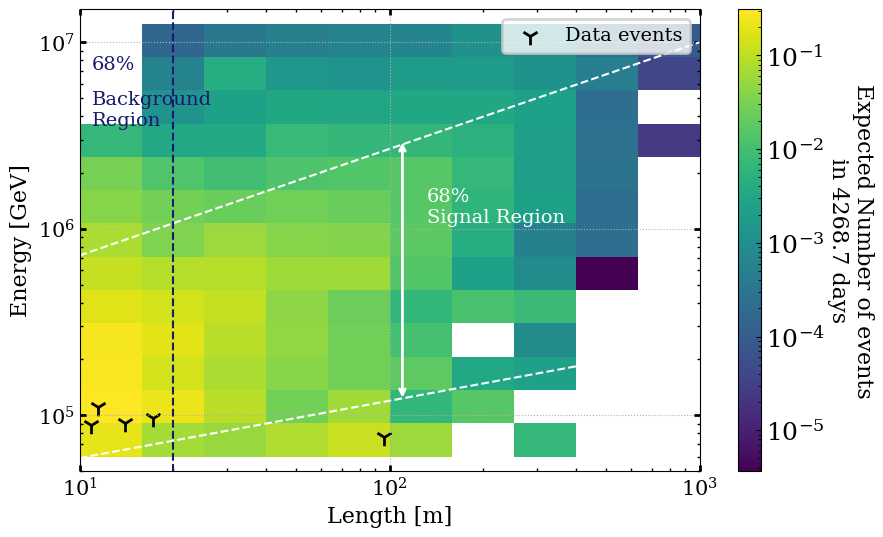

In [141]:
components,res = plot_data_mc(fit_res_file=fit_file,plot_components=True,\
             perbin_plots=True,params_all_zero=params_all_zero,
             component_graphdict=component_graphdict,plot_dir=plot_dir,plot_name='DataMC')

In [143]:
sum_conv = sum(sum(components["hists"]['conv']['mu']))
sum_prompt = sum(sum(components["hists"]['prompt']['mu']))
sum_astro_allflavor = sum(sum(components["hists"]["astro_allflavor"]["mu"]))
sum_astro_nonue = sum(sum(components["hists"]["astro_nonue"]["mu"]))
sum_astro_nonutau = sum(sum(components["hists"]["astro_nonutau"]["mu"]))
sum_astro_nonuenutau = sum(sum(components["hists"]["astro_nonuenutau"]["mu"]))
sum_astro_numu = sum_astro_nonuenutau
sum_astro_nue = sum_astro_nonutau - sum_astro_numu
sum_astro_nutau = sum_astro_nonue - sum_astro_numu

sum_res = sum(sum((res["mu"])))

print("lets check components")
print("sum_conv", sum_conv)
print("sum_prompt", sum_prompt)
print("sum_astro_allflavor", sum_astro_allflavor)

print("lets compare the plot with the components")
print(sum_res, sum_conv+sum_prompt+sum_astro_allflavor)

print("lets check astro flavor components")
print("sum_astro_allflavor", sum_astro_allflavor)
print("sum_astro_numu+sum_astro_nue+sum_astro_nutau", sum_astro_numu+sum_astro_nue+sum_astro_nutau)



lets check components
sum_conv 0.3402475737865979
sum_prompt 0.11034184533468942
sum_astro_allflavor 3.809651329616353
lets compare the plot with the components
4.1059627524786455 4.26024074873764
lets check astro flavor components
sum_astro_allflavor 3.809651329616353
sum_astro_numu+sum_astro_nue+sum_astro_nutau 3.809651329616353


In [139]:
len(components["hists"]["astro_allflavor"]["mu"][0])

10

In [155]:
# manual check
from NNMFit import AnalysisConfig
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.nnm_fitter import NNMFitter
from NNMFit.utilities import override_dict_entries, load_pickle

import yaml

In [157]:
fit_res_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/Freefit_05.pickle'
fit_res = pd.read_pickle(fit_res_file)

# read fit config from scan dir
fit_config_file = os.path.join(
    os.path.dirname(fit_res_file), 'Fit_Configuration.yaml'
)

with open(fit_config_file) as hdl:
    fit_config = yaml.safe_load(hdl)

config_hdl = AnalysisConfig.from_dict(fit_config)
config_dict = config_hdl.to_dict()


hist_graph = HistogramGraph.from_configdict(config_dict)

nnmfitter = NNMFitter(config_hdl)
data = nnmfitter.get_data_hists(as_array=True)

In [161]:
det_conf = 'IC86_pass2_SnowStorm_v2_Bfr_DoubleCascades'

temp = hist_graph.get_binning(det_conf)

bins_energy = temp["reco_energy"]
bins_length = temp["reco_length"]


In [ ]:
param_values = {}

param_values['best_fit'] = dict(fit_res['fit-result'][1])
# take into account fixed paratmeters
param_values['best_fit'].update(fit_res['fixed-parameters'])

fit_params = param_values['best_fit']

In [175]:
scenarios = {
    'all' : {},
    'nothing' : {'conv_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0, "astro_norm" : 0, "astro_nue_ratio" : 0, "astro_nutau_ratio" : 0},
    'astro_allflavor' : {'conv_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0},
    'astro_nonue' : {'conv_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0, "astro_nue_ratio" : 0},
    'astro_nonutau' : {'conv_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0, "astro_nutau_ratio" : 0},
    'astro_nonuenutau' : {'conv_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0, "astro_nue_ratio" : 0, "astro_nutau_ratio" : 0},
    'conv' :  {'astro_norm' : 0, "prompt_norm" : 0, "muongun_norm" : 0}, 
    'prompt' : {'astro_norm' : 0, "conv_norm" : 0, "muongun_norm" : 0}, 
    'muon' : {'conv_norm' : 0, "prompt_norm" : 0, "astro_norm" : 0}
}

In [176]:
results = {}

for scenario_name in scenarios:

    override_dict = scenarios[scenario_name]

    fit_params_tmp = fit_params.copy()

    for key in override_dict: fit_params_tmp[key] = override_dict[key]

    # pseudoexp bestfit
    res = hist_graph.get_evaled_histogram(
        det_config=det_conf, input_variables=fit_params_tmp, reshape=True
    )

    results[scenario_name] = sum(sum(res["mu"]))

    print("scenario_name", scenario_name, results[scenario_name])

scenario_name all 4.1059627524786455
scenario_name nothing 0.43153102861005915
scenario_name astro_allflavor 3.903502765732641
scenario_name astro_nonue 3.440278678097927
scenario_name astro_nonutau 1.0944517623861225
scenario_name astro_nonuenutau 0.675351126326679
scenario_name conv 0.580221752973498
scenario_name prompt 0.43153102861005915
scenario_name muon 0.43153102861005915


In [169]:
fit_params

{'astro_norm': 2.5277852222696753,
 'astro_nue_ratio': 0.45232987213122944,
 'astro_nutau_ratio': 0.8963998364159318,
 'gamma_astro': 2.8429418575098397,
 'inel_scale': 0.999950692509751,
 'CR_grad': 0.04816420768006666,
 'barr_h': -3.603662184955879e-05,
 'barr_w': -0.001794286951860185,
 'barr_y': -0.01004913618573267,
 'barr_z': -0.004247966017242478,
 'conv_norm': 0.9955774852653808,
 'delta_gamma': -0.00012043215168910682,
 'prompt_norm': 0.0,
 'muongun_norm': 1.1596479279870846,
 'dom_eff': 1.043904437153759,
 'ice_abs': 0.9885817135163371,
 'ice_scat': 0.9794450117263607,
 'ice_holep0': -0.26734101032284746,
 'ice_holep1': -0.08416403190869036,
 'ice_aniso': 0.9076585570846607}

4.1059627524786455